# Data Exploration

## Taxi 2023

In [1]:
import pandas as pd

In [2]:
df_taxi = pd.read_csv('Dataset/Taxi_Trips_2024.csv')

In [3]:
df_taxi.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')

In [4]:
# drop the rows of Pickup Census Tract, Dropoff Census Tract, Pickup Community Area, Dropoff Community Area     
df_taxi = df_taxi.drop(['Pickup Census Tract', 'Dropoff Census Tract', 'Pickup Community Area', 'Dropoff Community Area'], axis=1)
df_taxi.dropna(inplace=True)    

In [5]:
df_taxi.shape

(1740247, 19)

In [14]:
df_taxi.isnull().sum()

Trip ID                       0
Taxi ID                       0
Trip Start Timestamp          0
Trip End Timestamp            0
Trip Seconds                  0
Trip Miles                    0
Fare                          0
Tips                          0
Tolls                         0
Extras                        0
Trip Total                    0
Payment Type                  0
Company                       0
Pickup Centroid Latitude      0
Pickup Centroid Longitude     0
Pickup Centroid Location      0
Dropoff Centroid Latitude     0
Dropoff Centroid Longitude    0
Dropoff Centroid  Location    0
dtype: int64

In [15]:
df_taxi.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0000184e7cd53cee95af32eba49c44e4d20adcd8,f538e6b729d1aaad4230e9dcd9dc2fd9a168826ddadbd6...,01/19/2024 05:00:00 PM,01/19/2024 06:00:00 PM,4051.0,17.12,45.50,10.00,0.0,4.0,60.00,Credit Card,Flash Cab,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
2,000074019d598c2b1d6e77fbae79e40b0461a2fc,aeb280ef3be3e27e081eb6e76027615b0d40925b84d3eb...,01/05/2024 09:00:00 AM,01/05/2024 09:00:00 AM,517.0,3.39,10.91,2.78,0.0,1.0,14.69,Mobile,Taxicab Insurance Agency Llc,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
4,00007c3e7546e2c7d15168586943a9c22c3856cf,8ef1056519939d511d24008e394f83e925d2539d668a00...,01/18/2024 07:15:00 PM,01/18/2024 07:30:00 PM,1004.0,1.18,15.94,3.72,0.0,0.0,19.66,Mobile,5 Star Taxi,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
5,0000bab44d0d673a222e7f1a0a6026563519aa25,833e49f9757b594a8a6765b93d1f7d8ad483e61c3a89d1...,01/09/2024 05:00:00 PM,01/09/2024 05:00:00 PM,12.0,0.18,3.50,0.00,0.0,0.0,3.50,Cash,Taxicab Insurance Agency Llc,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
6,0000cf293ada965f89a98c8ccfae7b0ce3a03e41,37073e8c9e454886fe4a916f80a9a3478570e7dd3e663f...,01/04/2024 07:15:00 AM,01/04/2024 07:30:00 AM,484.0,1.59,7.75,1.24,0.0,0.0,9.49,Mobile,City Service,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)


In [6]:
len(df_taxi['Taxi ID'].unique())

2887

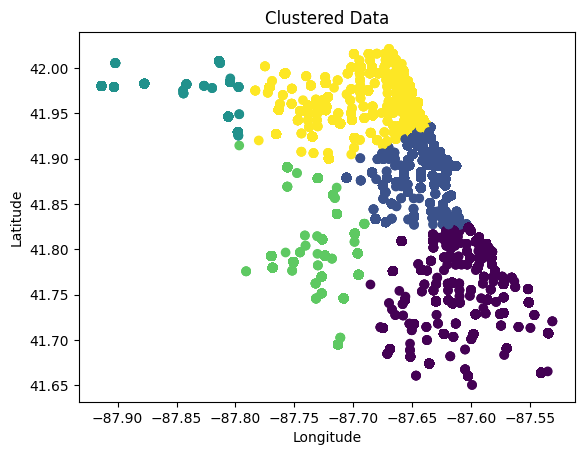

In [7]:
# cluster the data based on Pickup Centroid Latitude and Pickup Centroid Longitude 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = df_taxi 

# Select the features for clustering
X = data[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # Specify the number of clusters
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['Cluster'] = labels

# Plot the clusters
plt.scatter(data['Pickup Centroid Longitude'], data['Pickup Centroid Latitude'], c=data['Cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Data')
plt.show()

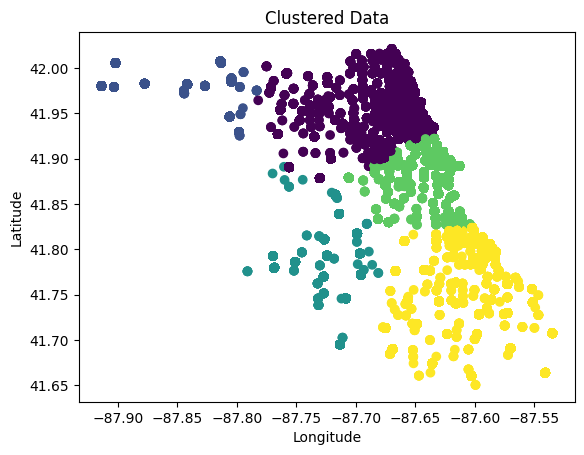

In [8]:
# cluster the data based on Pickup Centroid Latitude and Pickup Centroid Longitude 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = df_taxi 

# Select the features for clustering
X = data[['Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # Specify the number of clusters
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['Cluster'] = labels

# Plot the clusters
plt.scatter(data['Dropoff Centroid Longitude'], data['Dropoff Centroid Latitude'], c=data['Cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Data')
plt.show()

In [12]:
from sklearn.cluster import KMeans
import numpy as np

# Extract the relevant columns for clustering
coords = df_taxi[['Pickup Centroid Latitude', 'Pickup Centroid Longitude', 
                    'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']]

# Handle any missing values by dropping them (if any)
coords = coords.dropna()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
coords['cluster'] = kmeans.fit_predict(coords)

# import ace_tools as tools; tools.display_dataframe_to_user(name="Clustered Taxi Trips", dataframe=coords)

coords.head()




,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,cluster
0,41.979071,-87.903040,41.884987,-87.620993,2
2,41.944227,-87.655998,41.899602,-87.633308,3
4,41.880994,-87.632746,41.880994,-87.632746,3
5,41.965812,-87.655879,41.944227,-87.655998,0
6,41.879255,-87.642649,41.884987,-87.620993,3


/var/folders/09/n6h20cnx4z3c85s52kvdjkg80000gn/T/ipykernel_2599/1914051722.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(coords['Dropoff Centroid Longitude'], coords['Dropoff Centroid Latitude'],


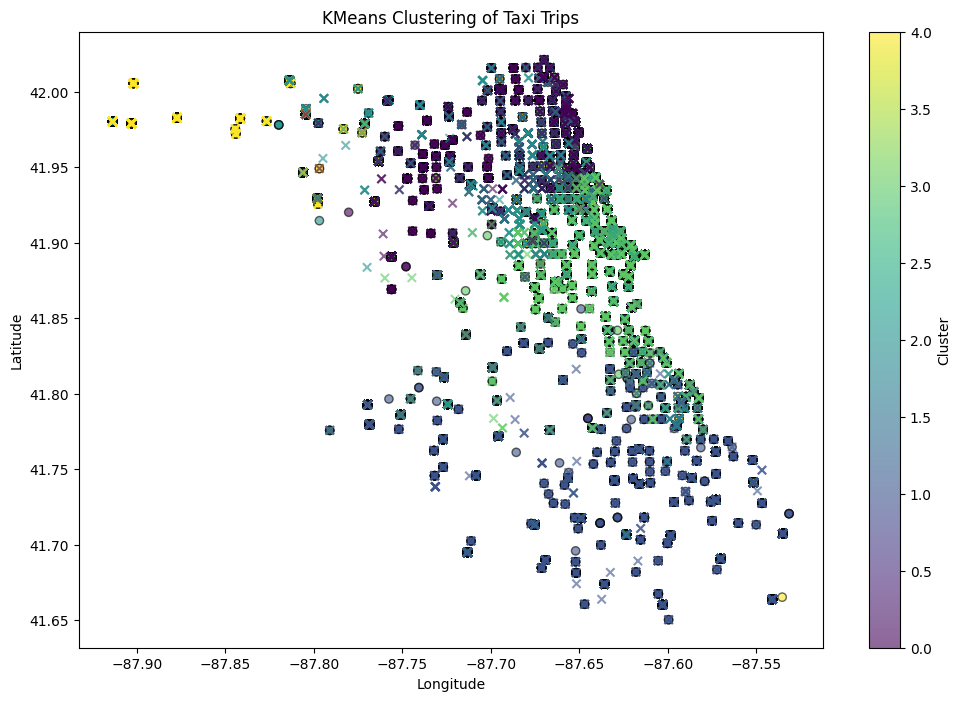

In [14]:
import matplotlib.pyplot as plt

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Scatter plot of pickup locations colored by cluster
plt.scatter(coords['Pickup Centroid Longitude'], coords['Pickup Centroid Latitude'], 
            c=coords['cluster'], cmap='viridis', marker='o', alpha=0.6, edgecolor='k')

# Scatter plot of dropoff locations colored by cluster (optional, for a clearer visualization)
plt.scatter(coords['Dropoff Centroid Longitude'], coords['Dropoff Centroid Latitude'], 
            c=coords['cluster'], cmap='viridis', marker='x', alpha=0.6, edgecolor='k')

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering of Taxi Trips')
plt.colorbar(label='Cluster')
# please include the label for clusters 


# Show plot
plt.show()


In [13]:
 coords['cluster'].unique()

array([2, 3, 0, 1, 4], dtype=int32)

In [ ]:
# visualize clusters 
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
%pip install ace-tools


ERROR: Could not find a version that satisfies the requirement ace-tools (from versions: none)
ERROR: No matching distribution found for ace-tools
Note: you may need to restart the kernel to use updated packages.
